In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [15]:
corr_matrix=df.corr()
corr_matrix['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [16]:
df=df.drop(['fbs','chol','restecg','trestbps'],axis=1)
df.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1


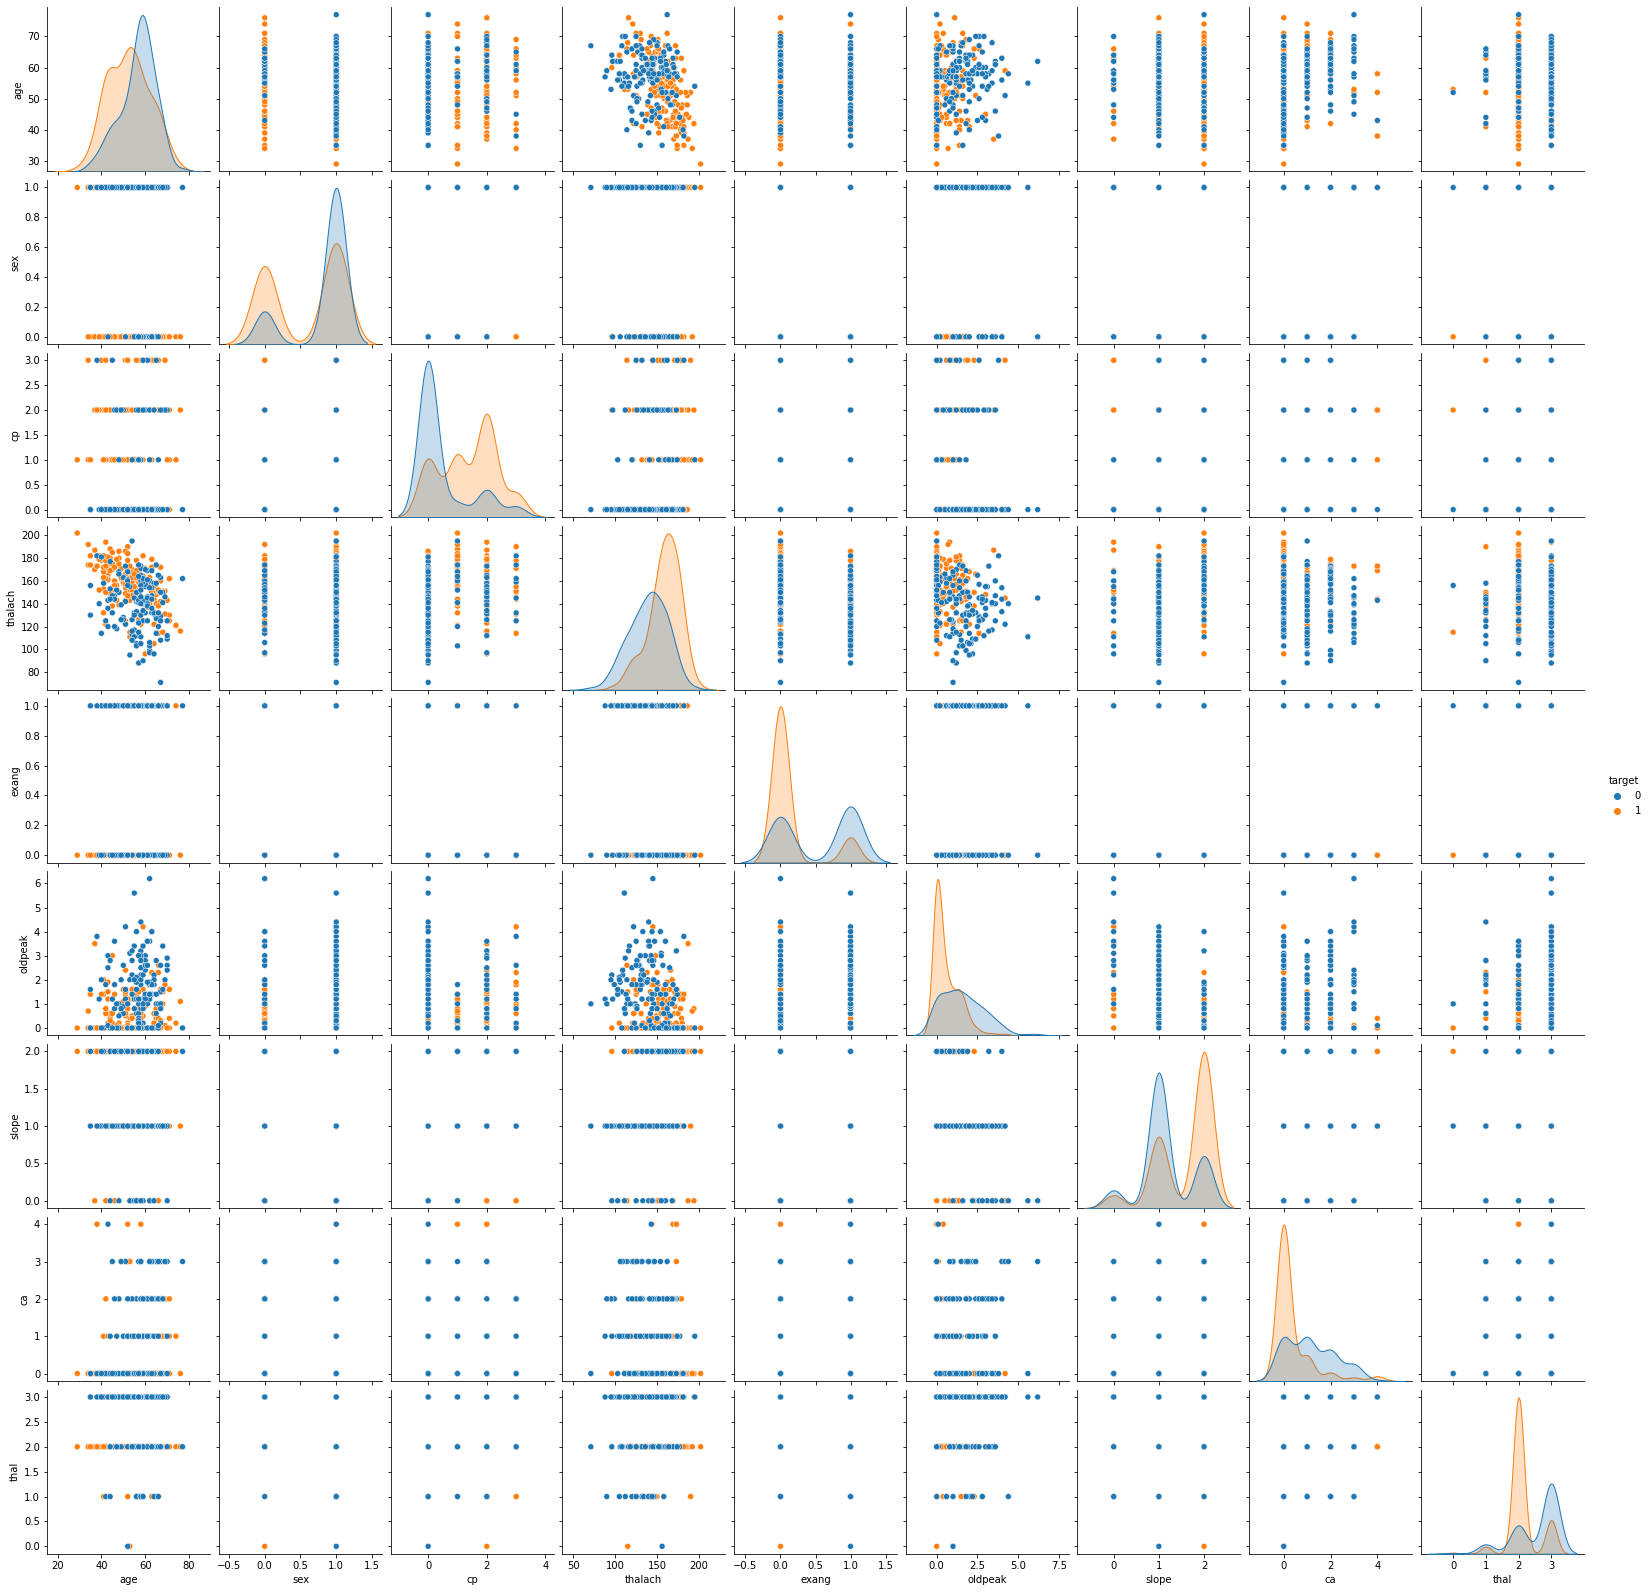

In [17]:
sns.pairplot(df,hue='target')

In [21]:
df[df['age']<30]

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,202,0,0.0,2,0,2,1


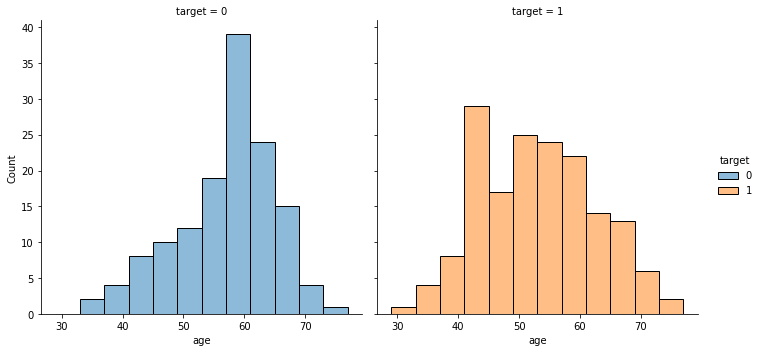

In [22]:
sns.displot(df,x='age',hue='target',col='target')

In [23]:
df['age'].mean()

54.366336633663366

In [31]:
df['age'].value_counts(ascending=True)

77     1
76     1
74     1
29     1
37     2
34     2
38     3
40     3
69     3
71     3
70     4
68     4
39     4
35     4
47     5
49     5
50     7
66     7
48     7
46     7
53     8
65     8
45     8
42     8
43     8
55     8
61     8
67     9
63     9
41    10
64    10
44    11
60    11
56    11
62    11
51    12
52    13
59    14
54    16
57    17
58    19
Name: age, dtype: int64

<AxesSubplot:>

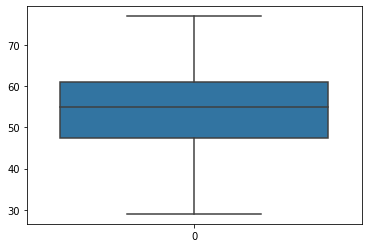

In [33]:
sns.boxplot(df['age'])

<AxesSubplot:>

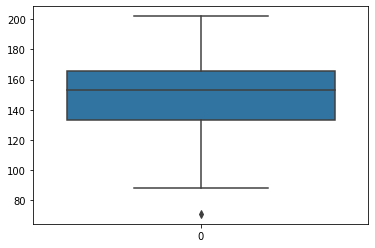

In [35]:
sns.boxplot(df['thalach'])

In [37]:
df[df['thalach']<75]

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,71,0,1.0,1,0,2,0


In [38]:
df.shape

(303, 10)

In [39]:
df=df[df['thalach']>75]

In [40]:
df.shape

(302, 10)

<AxesSubplot:>

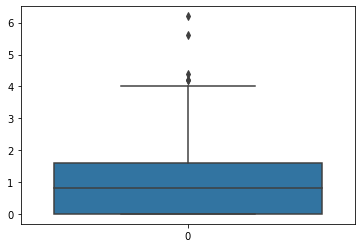

In [41]:
sns.boxplot(df['oldpeak'])

In [43]:
df[df['oldpeak']>4.1]

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
101,59,1,3,145,0,4.2,0,0,3,1
204,62,0,0,145,0,6.2,0,3,3,0
221,55,1,0,111,1,5.6,0,0,3,0
250,51,1,0,122,1,4.2,1,3,3,0
291,58,1,0,140,0,4.4,0,3,1,0


In [44]:
df['oldpeak'].mean()

1.0397350993377483

In [45]:
df=df[df['oldpeak']<4.1]

In [46]:
df.shape

(297, 10)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 302
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    int64  
 1   sex      297 non-null    int64  
 2   cp       297 non-null    int64  
 3   thalach  297 non-null    int64  
 4   exang    297 non-null    int64  
 5   oldpeak  297 non-null    float64
 6   slope    297 non-null    int64  
 7   ca       297 non-null    int64  
 8   thal     297 non-null    int64  
 9   target   297 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 25.5 KB


In [55]:
df.duplicated().sum()

1

In [57]:
df.shape

(296, 10)

In [58]:
df=df.drop_duplicates()

In [59]:
X=df.drop('target',axis=1)
y=df['target']

In [60]:
df.describe()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.334459,0.679054,0.972973,150.121622,0.327703,0.977703,1.418919,0.702703,2.310811,0.550676
std,9.090485,0.467631,1.028054,22.493059,0.470171,1.051573,0.599588,0.987786,0.608988,0.498268
min,29.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,135.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,153.500000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,166.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [63]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
model1=LogisticRegression()

In [66]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(model1,X_train,y_train,cv=3)

In [67]:
a

array([0.8115942 , 0.76811594, 0.82608696])

In [68]:
a.mean()

0.8019323671497585

In [69]:
model1.fit(X_train,y_train)

LogisticRegression()

In [70]:
y_pred1=model1.predict(X_test)

In [71]:
model1.score(X_test,y_test)

0.8539325842696629

In [74]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81        32
           1       0.91      0.86      0.88        57

    accuracy                           0.85        89
   macro avg       0.84      0.85      0.84        89
weighted avg       0.86      0.85      0.86        89



In [76]:
confusion_matrix(y_pred1,y_test)

array([[27,  5],
       [ 8, 49]], dtype=int64)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
model2=KNeighborsClassifier()

In [84]:
scores=[]
for i in range(1,20):
    model22=KNeighborsClassifier(n_neighbors=i)
    model22.fit(X_train,y_train)
    scores.append(model22.score(X_test,y_test))

In [85]:
scores

[0.8426966292134831,
 0.8539325842696629,
 0.8539325842696629,
 0.8539325842696629,
 0.8426966292134831,
 0.8314606741573034,
 0.8539325842696629,
 0.8314606741573034,
 0.8539325842696629,
 0.8426966292134831,
 0.8651685393258427,
 0.8539325842696629,
 0.8651685393258427,
 0.8539325842696629,
 0.8539325842696629,
 0.8539325842696629,
 0.8539325842696629,
 0.8314606741573034,
 0.8426966292134831]

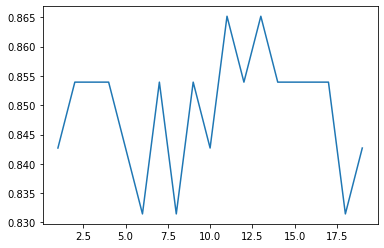

In [87]:
plt.plot(range(1,20),scores)

In [88]:
from sklearn.model_selection import GridSearchCV
grid2=GridSearchCV(model2,{'n_neighbors':[2,5,11,13]})

In [91]:
grid2.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 5, 11, 13]})

In [92]:
grid2.best_params_

{'n_neighbors': 13}

In [93]:
grid2.score(X_test,y_test)

0.8651685393258427

In [94]:
y_pred2=grid2.predict(X_test)

In [95]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        31
           1       0.93      0.86      0.89        58

    accuracy                           0.87        89
   macro avg       0.85      0.87      0.86        89
weighted avg       0.87      0.87      0.87        89



In [96]:
confusion_matrix(y_pred2,y_test)

array([[27,  4],
       [ 8, 50]], dtype=int64)

In [97]:
from sklearn.svm import SVC
model3=SVC()

In [102]:
grid3=GridSearchCV(model3,{'kernel':['rbf','linear','poly'],'gamma':[0.3,0.4,0.5],'C':[100,150,200]})

In [103]:
grid3.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [100, 150, 200], 'gamma': [0.3, 0.4, 0.5],
                         'kernel': ['rbf', 'linear', 'poly']})

In [104]:
grid3.score(X_test,y_test)

0.8539325842696629

In [105]:
grid3.best_params_

{'C': 100, 'gamma': 0.3, 'kernel': 'linear'}

In [107]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()

In [141]:
grid4=GridSearchCV(model4,{'max_depth':[2,3,4],'max_features':[2,3,4],'min_samples_split':[1,2],'max_leaf_nodes':[10,15,20]})
grid4.fit(X_train,y_train)

C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4], 'max_features': [2, 3, 4],
                         'max_leaf_nodes': [10, 15, 20],
                         'min_samples_split': [1, 2]})

In [142]:
grid4.score(X_test,y_test)

0.8426966292134831

In [143]:
grid4.best_params_

{'max_depth': 3,
 'max_features': 2,
 'max_leaf_nodes': 20,
 'min_samples_split': 2}

In [144]:
from sklearn.ensemble import RandomForestClassifier
model5=RandomForestClassifier()

In [148]:
grid5=GridSearchCV(model5,{'n_estimators':[100,120,140],'max_depth':[3,6,8],'max_features':[2,3,4],'max_leaf_nodes':[10,20,30],'min_samples_split':[1,2,3]})
grid5.fit(X_train,y_train)

C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\bas

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 8], 'max_features': [2, 3, 4],
                         'max_leaf_nodes': [10, 20, 30],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 120, 140]})

In [149]:
grid5.score(X_test,y_test)

0.8651685393258427